### creating a deep neural network model to classify whether a fish in an image is healthy or sick. The provided data has approximately 200 images of healthy fish and 300 images of sick fish, distributed among 6 different diseases. 

### Import libraries


In [1]:
#Load libraries

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

### Load and Preprocess data

In [2]:

# Open the image file
image_path = 'fish\Bacterial diseases - Aeromoniasis/Bacterial diseases - Aeromoniasis (1).jpg'
image = Image.open(image_path)

# Get the size (width, height) of the image
image_size = image.size
print(f"Image size: {image_size}")


Image size: (224, 224)


In [3]:
# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [4]:
# Create a dictionary to store the count of images for each class
image_count = {}

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    
    # Use a list comprehension to get the list of image files
    image_files = [file for file in os.listdir(class_directory) if file.endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]
    
    # Get the count of images for the current class
    count = len(image_files)
    image_count[class_name] = count

# Print the image count for each class
for class_name, count in image_count.items():
    print(f"{class_name}: {count} images")

Bacterial diseases - Aeromoniasis: 49 images
Bacterial gill disease: 58 images
Bacterial Red disease: 48 images
Fungal diseases Saprolegniasis: 46 images
Healthy Fish: 177 images
Parasitic diseases: 38 images
Viral diseases White tail disease: 41 images


In [5]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(0 if class_name == 'Healthy Fish' else 1)


# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

fish\Bacterial diseases - Aeromoniasis


fish\Bacterial gill disease
fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


In [6]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
num_classes = 2  # Healthy and Sick
labels = to_categorical(labels, num_classes)

In [8]:
# Split the data into training, validation, and test sets
x_train, x, y_train, y = train_test_split(data, labels, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 2) 
The shape of validation data :(46, 128, 128, 3),(46, 2) 
The shape of test data :(46, 128, 128, 3),(46, 2) 


### Create a Model

In [9]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.4),
    Dense(128, activation='relu'),
    Dropout(rate=0.4),
    Dense(num_classes, activation='sigmoid')
])

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [11]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

### Train the model

In [12]:
# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


12/12 [==============================] - 13s 787ms/step - loss: 1.8366 - accuracy: 0.5380 - val_loss: 1.5088 - val_accuracy: 0.7174
Epoch 2/10
12/12 [==============================] - 8s 634ms/step - loss: 1.3870 - accuracy: 0.6005 - val_loss: 1.1807 - val_accuracy: 0.7174
Epoch 3/10
12/12 [==============================] - 8s 705ms/step - loss: 1.1354 - accuracy: 0.6141 - val_loss: 0.9717 - val_accuracy: 0.7174
Epoch 4/10
12/12 [==============================] - 9s 746ms/step - loss: 0.9485 - accuracy: 0.6277 - val_loss: 0.8162 - val_accuracy: 0.7826
Epoch 5/10
12/12 [==============================] - 8s 685ms/step - loss: 0.8417 - accuracy: 0.6793 - val_loss: 0.7633 - val_accuracy: 0.7609
Epoch 6/10
12/12 [==============================] - 9s 736ms/step - loss: 0.7606 - accuracy: 0.7147 - val_loss: 0.6220 - val_accuracy: 0.8043
Epoch 7/10
12/12 [==============================] - 10s 819ms/step - loss: 0.6556 - accuracy: 0.7663 - val_loss: 0.6722 - val_accuracy: 0.7174
Ep

### Visualize the model performance

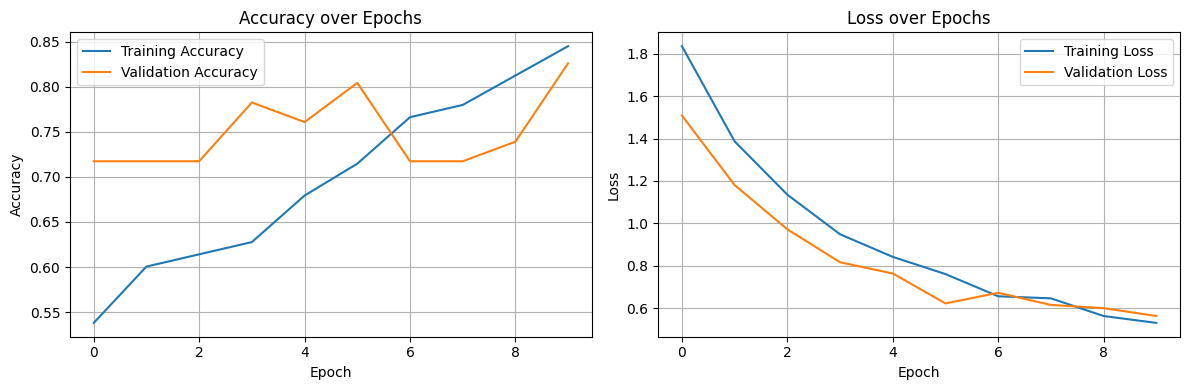

In [13]:
plt.figure(figsize=(12, 4))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


### Evaluate on the test set

In [14]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

2/2 [==============================] - 1s 96ms/step - loss: 0.4624 - accuracy: 0.8261
Test Accuracy: 0.83
Test Loss: 0.46


In [15]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

2/2 [==============================] - 1s 92ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.84      0.90      0.87        29

    accuracy                           0.83        46
   macro avg       0.82      0.80      0.81        46
weighted avg       0.82      0.83      0.82        46



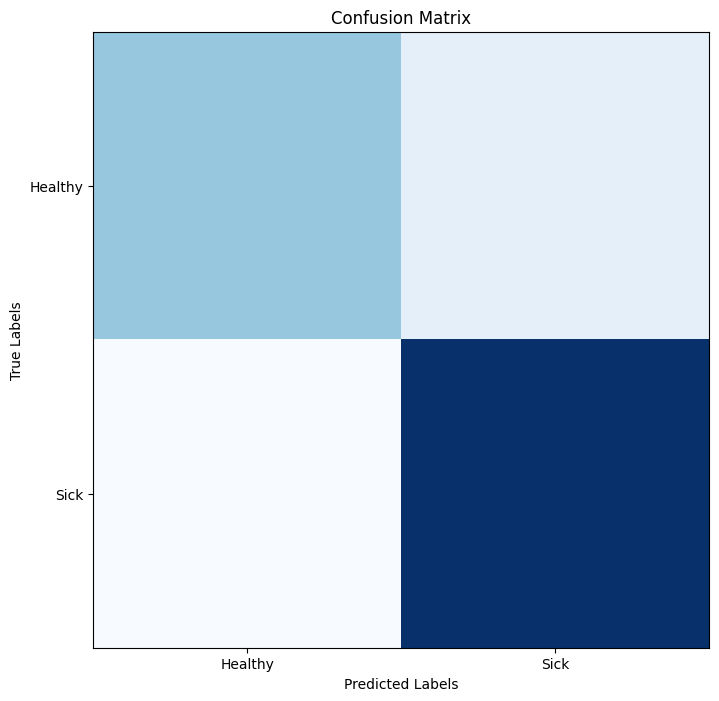

In [16]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Frågor:


### • Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.

#### Model Architecture: 
The chosen model architecture is a Convolutional Neural Network (CNN), which is a suitable choice for image classification tasks. The architecture consists of convolutional layers with max-pooling for feature extraction, followed by fully connected layers for classification. Dropout is employed to reduce overfitting.
#### Hyperparameters: 
The choice of hyperparameters includes the use of ReLU activation functions, a kernel size of (3, 3) for convolutional layers, max-pooling layers with a pool size of (2, 2), and dropout layers with a dropout rate of 0.4. L2 regularization is applied to some convolutional layers to prevent overfitting.


### • Har du använt någon databehandling? Varför?

Yes, data preprocessing steps include resizing images to (128, 128) ensures uniformity in input dimensions. 
Pixel values are normalized to the range [0, 1] where as normalization helps stabilize training.
One-hot encoding is applied to the labels and it is necessary for the categorical cross-entropy loss used in training the model.The dataset is split into training, validation, and test sets.


### • Utvärdera modellens prestanda.

The model achieves a test accuracy of 83%, indicating its ability to correctly classify healthy and sick fish images. The loss on the test set is 0.46.A classification report and confusion matrix provide insights into precision, recall, and F1-score for each class.

### • Är prestandan bra? Varför/ varför inte?
The performance is reasonable, with an accuracy of 83%. However, the model might benefit from further tuning and optimization.

### • Vad hade du kunnat göra för att förbättra den ytterligare?

- Data augmentation: Augmenting the dataset through random transformations during training can improve model generalization.
- Fine-tuning: Experimenting with different architectures or hyperparameters might yield better results.
- Early stopping: Implementing early stopping based on validation loss could prevent overfitting and save training time.
- Hyperparameter tuning: Systematically searching for optimal hyperparameters could enhance model performance.
- Transfer learning: Using pre-trained models on larger datasets might provide better feature extraction.